# Reema Bakhale

## Problem Statement : Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. 

### Step 1: Importing the required libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.cluster import KMeans

### Step 2: Loading the Iris Dataset

In [243]:
Iris_Data = pd.read_csv("C:/Users/reemd/Desktop/Ivy_Docs/The Sparks Foundation_Internship/Iris.csv")

### Step 3 : Analysing the Data

#### 3.1 showing sample data

In [244]:
Iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 3.2 checking the shape of data

In [245]:
Iris_Data.shape

(150, 6)

#### 3.3 checking the dataset schema

In [231]:
Iris_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SepalLengthCm       150 non-null    float64
 1   SepalWidthCm        150 non-null    float64
 2   PetalLengthCm       150 non-null    float64
 3   PetalWidthCm        150 non-null    float64
 4   Species             150 non-null    object 
 5   predictedClusterID  150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


#### 3.4 checking statistical info of different columns in the dataset

In [232]:
Iris_Data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predictedClusterID
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.160000
std,0.828066,0.433594,1.764420,0.763161,0.803349
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 3.5 checking null values

In [196]:
# Checking null values
Iris_Data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### 3.6 checking unique values for each column

In [197]:
# Checking unique values for each column
Iris_Data.nunique()


Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

#### 3.7 pie chart showing the distribution of different species of iris in the dataset

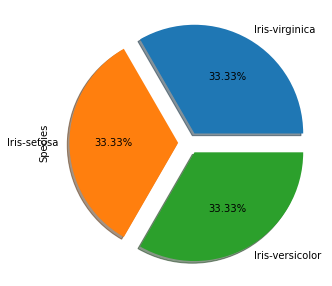

In [198]:
#ax=plt.subplots(1,1,figsize=(10,8))
Iris_Data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True,figsize=(8,5))

### Step 4 : Data Pre-processing

#### 4.1 dropping unnecessary columns

In [199]:
Iris_Data.drop(['Id'],inplace=True,axis=1)

### Step 5 : Using "Elbow Method" to find the optimum number of clusters 

In [200]:
#Finding the best number of clusters based on the inertia value using KMeans Clssification.
x = Iris_Data.iloc[:, [0, 1, 2, 3]].values
wcss = []  # distortions

num_clusters = range(1,11)
# Populating distortions for various clusters
for i in num_clusters:
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0
    ).fit(x)
    wcss.append(km.inertia_)

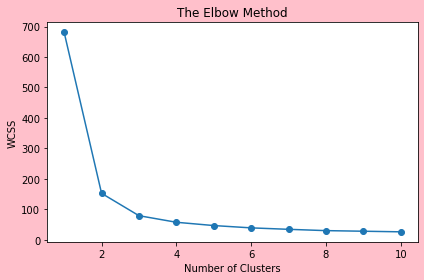

In [225]:
# Plotting the results onto a line graph allowing us to observe "The elbow"
plt.plot(num_clusters,wcss,marker='o')
#ax = plt.axes()
#ax.set_facecolor('xkcd:mint green')
plt.rcParams['figure.facecolor'] = 'pink'
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  #WCSS (Within cluster sum of squares)
plt.tight_layout()
plt.show()


#### Observation based on elbow method : Using the above graph to determine optimum number of clusters.

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

### Step 6 : Applying "KMeans Clustering Algorithm" to the Dataset

In [202]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [248]:
Iris_Data["predictedClusterID"] = y_kmeans
#print(Iris_Data)

### Step 7 : Checking the Results

#### 7.1 plotting the values and their clusters predicted by the model.

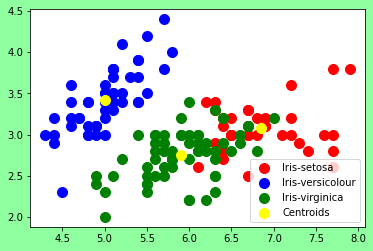

In [230]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.rcParams['figure.facecolor'] = ('xkcd:mint green')
plt.legend()

#### 7.2 showing "accuracy" in form of metrics

In [205]:
pd.crosstab(index=Iris_Data["predictedClusterID"], columns=Iris_Data["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
predictedClusterID,,,
0,0,2,36
1,50,0,0
2,0,48,14


The table numerically illustrates what the graph had shown. All Setosa are classified as a single group. There is some classification variation in Versicolor and even more in Virginia. From the graph, we know that 48 Versicolor and 14 Virginia were classified into cluster two whereas two Versicolor and 36 Virginia were classified into cluster zero. As the graph shows that difference between Versicolor and Verginica is smaller than with Setosa, that may explain the variation in the clustering.

From the graph we can find that cluster zero is Virginica, cluster two is Versicolor and cluster one is Setosa. With the help of this information, we will try to calculate the accuracy of our algorithm.

In [206]:
#Accuracy is the sum of correct observation by the total observation
(50+48+36)/150

0.8933333333333333

### Conclusion :
#### The model has an accuracy of approximately 90%.
#### Hence it can be concluded that the "K-Means algorithm" did a great job in clustering the data.